<a href="https://colab.research.google.com/github/2303A54040/aiml-2024-2025/blob/main/aiml_lab_exam_2303A54040_dataset_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
file_path = "/content/drive/MyDrive/IRIS.csv"
data = pd.read_csv(file_path)


In [4]:
print("Dataset Head:")
print(data.head())

Dataset Head:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [5]:
print("\nDataset Info:")
print(data.info())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [6]:
print("\nChecking for missing values:")
print(data.isnull().sum())


Checking for missing values:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [7]:
print("\nBasic Statistical Summary:")
print(data.describe())


Basic Statistical Summary:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


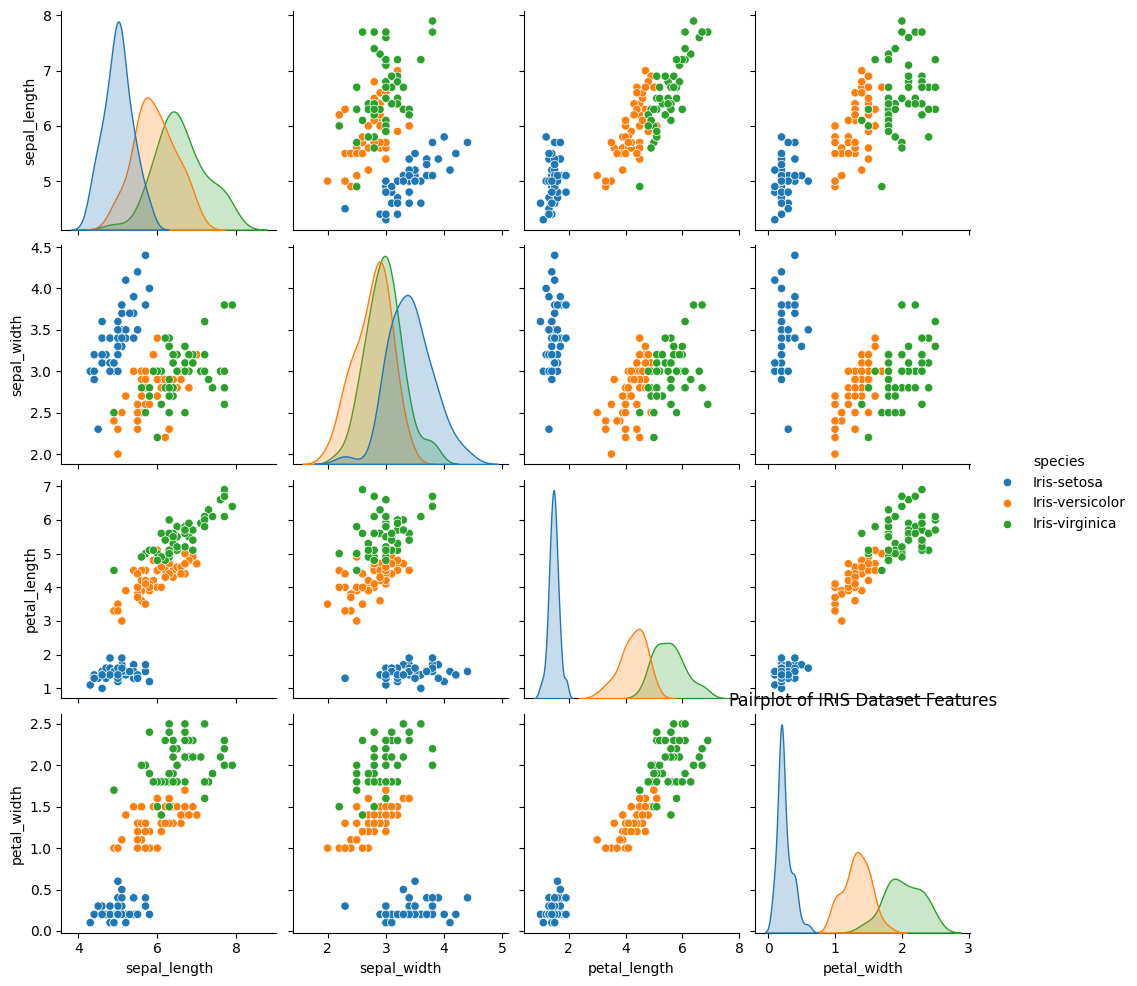

In [8]:
sns.pairplot(data, hue='species', diag_kind='kde')
plt.title('Pairplot of IRIS Dataset Features')
plt.show()


In [14]:
X = data.drop(columns=['species'])
y = data['species']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [17]:
knn_2 = KNeighborsClassifier(n_neighbors=2)
knn_2.fit(X_train_scaled, y_train)
y_pred_2 = knn_2.predict(X_test_scaled)

In [18]:
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(X_train_scaled, y_train)
y_pred_3 = knn_3.predict(X_test_scaled)

In [19]:
print("\nKNN with 2 Neighbors - Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_2)}")
print("Classification Report:")
print(classification_report(y_test, y_pred_2))



KNN with 2 Neighbors - Performance:
Accuracy: 0.8888888888888888
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.75      1.00      0.86        15
 Iris-virginica       1.00      0.67      0.80        15

       accuracy                           0.89        45
      macro avg       0.92      0.89      0.89        45
   weighted avg       0.92      0.89      0.89        45



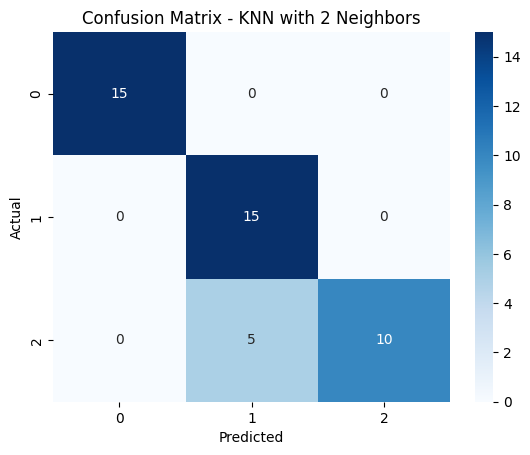

In [20]:
conf_matrix_2 = confusion_matrix(y_test, y_pred_2)
sns.heatmap(conf_matrix_2, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - KNN with 2 Neighbors')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [21]:
print("\nKNN with 3 Neighbors - Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_3)}")
print("Classification Report:")
print(classification_report(y_test, y_pred_3))


KNN with 3 Neighbors - Performance:
Accuracy: 0.9111111111111111
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.79      1.00      0.88        15
 Iris-virginica       1.00      0.73      0.85        15

       accuracy                           0.91        45
      macro avg       0.93      0.91      0.91        45
   weighted avg       0.93      0.91      0.91        45



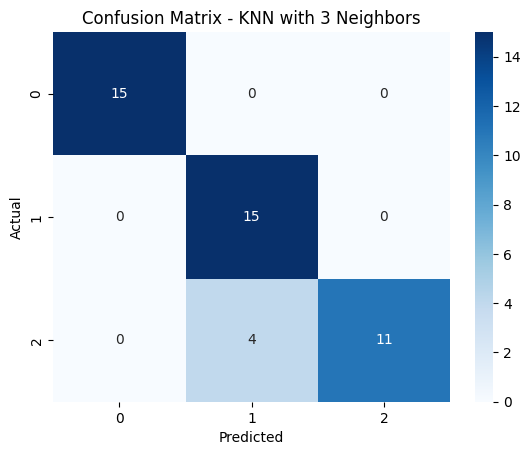

In [22]:
conf_matrix_3 = confusion_matrix(y_test, y_pred_3)
sns.heatmap(conf_matrix_3, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - KNN with 3 Neighbors')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [23]:
error_rates = []
k_values = range(1, 21)

In [32]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    error_rates.append(1 - accuracy_score(y_test, y_pred))

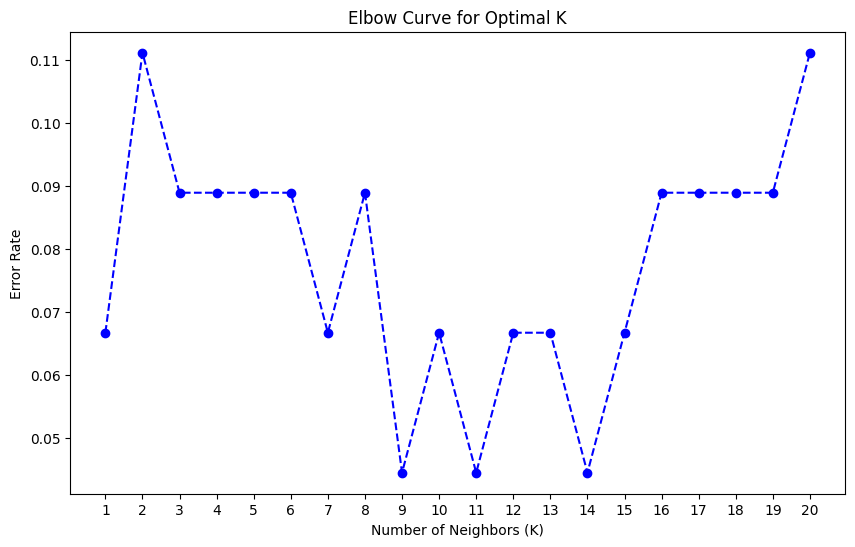

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, error_rates, marker='o', linestyle='--', color='b')
plt.title('Elbow Curve for Optimal K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Error Rate')
plt.xticks(k_values)
plt.show()